# prevent "vertigo syndrom" using glcm

"Vertigo" is a well-known phenomenon among pilots. The resemblance between the sky and the sea can create in the pilot a feeling that the sea is actually the sky and thus endanger the pilot's life.

Assuming there is a clean sky we can use the fact that the texture of the sea is different from the smooth sky and thus create a reliable system that the pilot can rely on ...

In [1]:
#  importing packages
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage import transform
import skimage
import tkinter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import data
from skimage.filters import threshold_otsu
from skimage import measure
from skimage import filters
from skimage.feature import greycomatrix, greycoprops

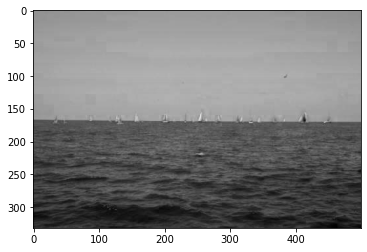

In [3]:
#  we will use a picture with clean sky and sea so we can aplly the algorithm:
picture_path = '/content/sample_data/sea_and_sky.jpg.crdownload' #input the image path
image = skimage.io.imread(fname= picture_path)
blue_channel =  image[:,:,2]
sky = blue_channel[0:100,0:100]
sea = blue_channel[250:,0:200]
plt.imshow(blue_channel, cmap='gray')

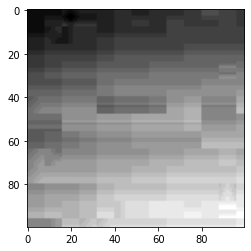

In [4]:
plt.imshow(sky, cmap='gray')

0.24774169921875

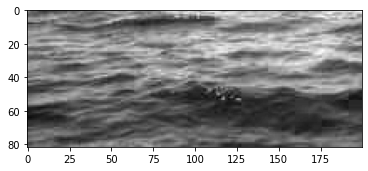

In [5]:
plt.imshow(sea, cmap='gray')
sea_glcm = greycomatrix(sea, [2], [0], 256)
np.mean(sea_glcm)

In [6]:
glcm = greycomatrix(sky, [5], [0], 256, symmetric=True, normed=True)
dissimilarity = greycoprops(glcm, 'dissimilarity') 
print("sky dissimilarity", dissimilarity)
correlation = greycoprops(glcm, 'correlation')
print("sky correlation", correlation)
homogeneity = greycoprops(glcm, 'homogeneity')
print("sky homogeneity", homogeneity)

sky dissimilarity [[0.44736842]]
sky correlation [[0.98524469]]
sky homogeneity [[0.80719076]]


In [7]:
glcm = greycomatrix(sea, [5], [0], 256, symmetric=True, normed=True)
dissimilarity = greycoprops(glcm, 'dissimilarity') 
print("sea dissimilarity", dissimilarity)
correlation = greycoprops(glcm, 'correlation')
print("sea correlation", correlation)
correlation = greycoprops(glcm, 'homogeneity')
print("sea homogeneity", correlation)

sea dissimilarity [[6.44077548]]
sea correlation [[0.87624507]]
sea homogeneity [[0.16059528]]


## Results
As can be seen, the dissimilarity of the sea is much higher than the sky. In addition, the homogeneity of the sea is much lower than the sky and can be relied upon to differentiate between the sea and the sky.
The correlation index does not differ significantly between sea and sky.


It's a clean sky


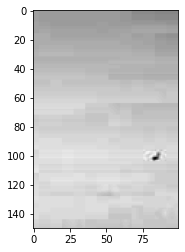

In [11]:
# now lets create a function that her input will be x,y pixels and her output will be if its a sea or sky:
def glcm_classification(image_path,y1,y2,x1,x2):
  image = skimage.io.imread(fname= image_path)
  blue_channel =  image[:,:,2]
  input_pixels = blue_channel[y1:y2,x1:x2]
  image_glcm = greycomatrix(input_pixels, [2], [0], 256)
  np.mean(image_glcm)
  glcm = greycomatrix(input_pixels, [5], [0], 256, symmetric=True, normed=True)
  dissimilarity = greycoprops(glcm, 'dissimilarity')
  if dissimilarity <= 1:
    print("It's a clean sky")
  else:
    print("It's the sea")
  return plt.imshow(input_pixels, cmap='gray') 

# now lets apply the function on specific pixels:
glcm_classification('/content/sample_data/sea_and_sky.jpg.crdownload',0,150,300,400)